In [1]:
import sys
sys.path.append('../') 

import numpy as np
import matplotlib.pyplot as plt
from datasets import SyntheticDataset

In [2]:
dataset_config = "../config/datasets_config/synthetic_dataset_default.yaml"


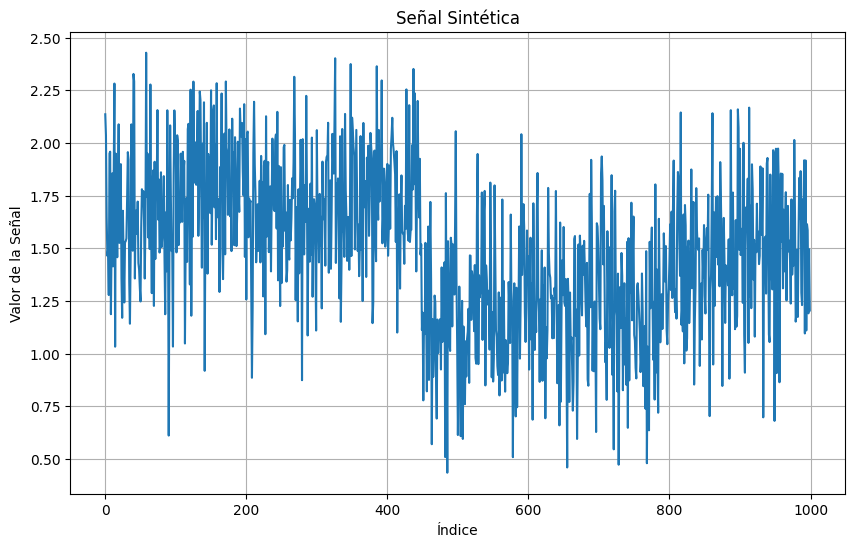

In [3]:
dataset = SyntheticDataset(config_file=dataset_config, mode="debug")

preprocessed_signal, original_signal, signal_windows, sequence, label = dataset[0]

# Graficar la señal
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(original_signal)  # Graficar la señal
plt.title('Señal Sintética')  # Título del gráfico
plt.xlabel('Índice')  # Etiqueta del eje x
plt.ylabel('Valor de la Señal')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula para mejorar la legibilidad
plt.show()

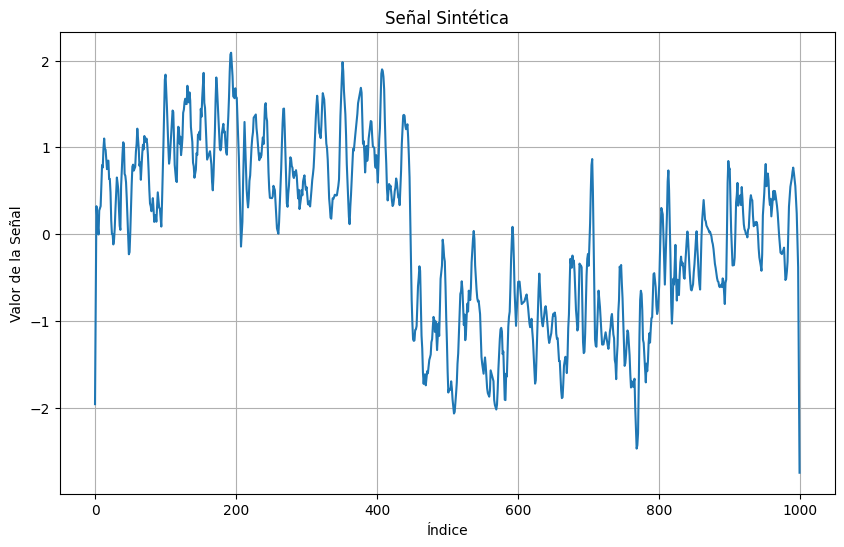

In [4]:
# Graficar la señal
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(preprocessed_signal)  # Graficar la señal
plt.title('Señal Sintética')  # Título del gráfico
plt.xlabel('Índice')  # Etiqueta del eje x
plt.ylabel('Valor de la Señal')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula para mejorar la legibilidad
plt.show()

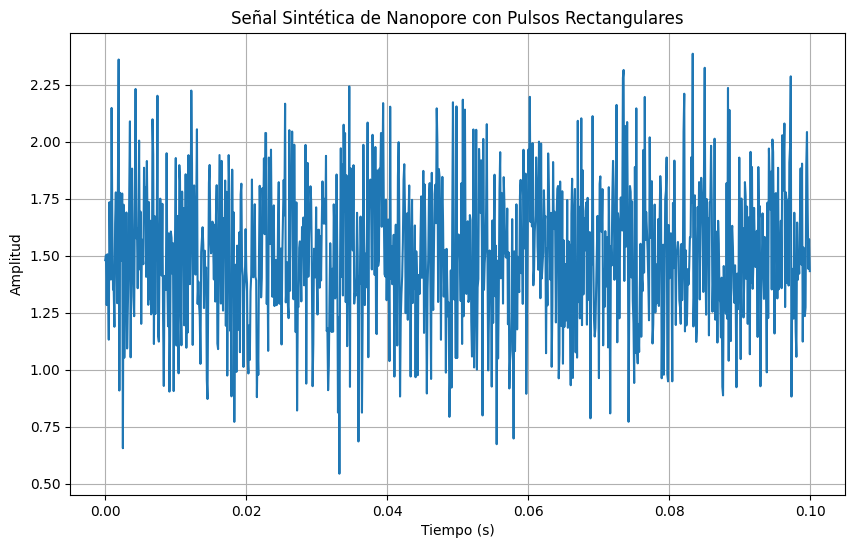

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las características de cada nucleótido
nucleotides = {
    'A': {'amplitude': 1.5, 'duration': 0.4},  # Amplitud y duración aproximada de la fluctuación
    'C': {'amplitude': 1.2, 'duration': 0.35},
    'G': {'amplitude': 1.7, 'duration': 0.45},
    'T': {'amplitude': 1.3, 'duration': 0.4}
}

# Parámetros de la simulación
sequence_length = 100  # Longitud de la secuencia de nucleótidos
sampling_rate = 10000  # Frecuencia de muestreo en Hz (10 kHz)
total_time = 1.0  # Duración total de la señal en segundos
time_points = np.linspace(0, total_time, int(sampling_rate * total_time))

# Generar la secuencia de nucleótidos
sequence = np.random.choice(list(nucleotides.keys()), size=sequence_length)

# Generar la señal sintética
signal = np.zeros_like(time_points)

# Inicializar el índice del tiempo
current_time = 0
for nucleotide in sequence:
    # Características del nucleótido
    amplitude = nucleotides[nucleotide]['amplitude']
    duration = nucleotides[nucleotide]['duration']
    
    # Generar pulso rectangular para este nucleótido
    end_time = current_time + duration
    pulse_time_points = time_points[(time_points >= current_time) & (time_points <= end_time)]
    
    # Generar el pulso rectangular
    pulse = amplitude * np.ones_like(pulse_time_points)  # Pulso constante durante la duración
    signal[(time_points >= current_time) & (time_points <= end_time)] = pulse
    
    # Avanzar al siguiente tiempo
    current_time = end_time

# Añadir ruido a la señal
noise = np.random.normal(0, 0.3, len(signal))  # Ruido gaussiano
signal += noise

# Visualizar la señal generada
plt.figure(figsize=(10, 6))
plt.plot(time_points[:1000], signal[:1000])  # Mostrar los primeros 1000 puntos para visualización
plt.title('Señal Sintética de Nanopore con Pulsos Rectangulares')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


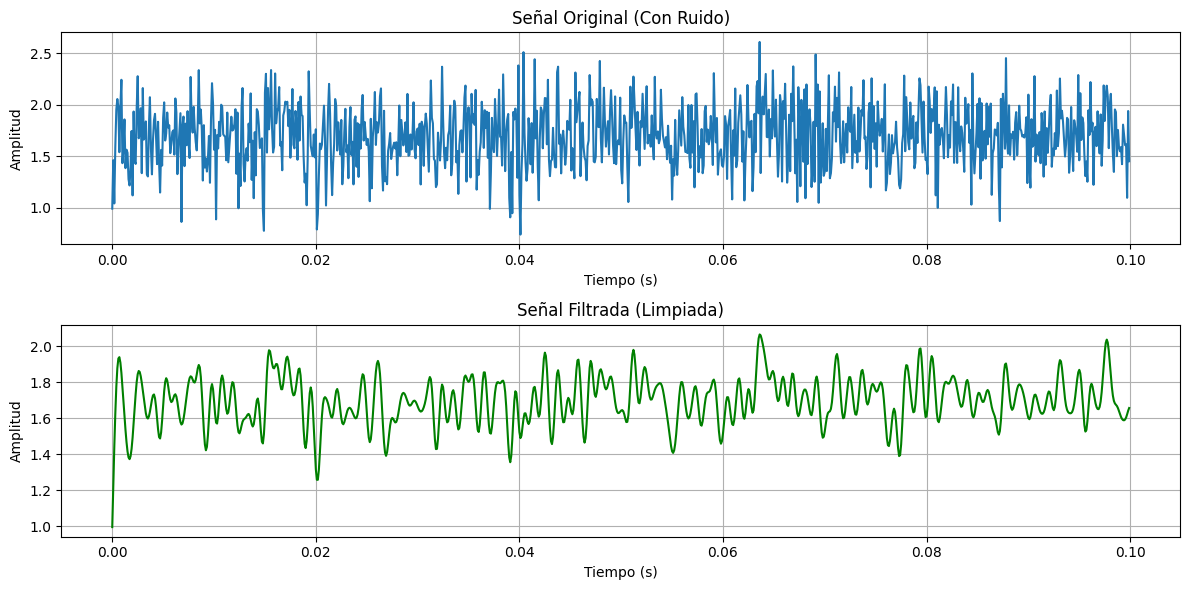

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Función para aplicar un filtro de paso bajo
def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs  # Frecuencia de Nyquist
    normal_cutoff = cutoff / nyquist  # Normalizar la frecuencia de corte
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Crear el filtro
    return filtfilt(b, a, data)  # Aplicar el filtro

# Parámetros de la simulación
sequence_length = 100  # Longitud de la secuencia de nucleótidos
sampling_rate = 10000  # Frecuencia de muestreo en Hz (10 kHz)
total_time = 1.0  # Duración total de la señal en segundos
time_points = np.linspace(0, total_time, int(sampling_rate * total_time))

# Definir las características de cada nucleótido
nucleotides = {
    'A': {'amplitude': 1.5, 'duration': 0.4},  # Amplitud y duración aproximada de la fluctuación
    'C': {'amplitude': 1.2, 'duration': 0.35},
    'G': {'amplitude': 1.7, 'duration': 0.45},
    'T': {'amplitude': 1.3, 'duration': 0.4}
}

# Generar la secuencia de nucleótidos
sequence = np.random.choice(list(nucleotides.keys()), size=sequence_length)

# Generar la señal sintética
signal = np.zeros_like(time_points)

# Inicializar el índice del tiempo
current_time = 0
for nucleotide in sequence:
    # Características del nucleótido
    amplitude = nucleotides[nucleotide]['amplitude']
    duration = nucleotides[nucleotide]['duration']
    
    # Generar pulso rectangular para este nucleótido
    end_time = current_time + duration
    pulse_time_points = time_points[(time_points >= current_time) & (time_points <= end_time)]
    
    # Generar el pulso rectangular
    pulse = amplitude * np.ones_like(pulse_time_points)  # Pulso constante durante la duración
    signal[(time_points >= current_time) & (time_points <= end_time)] = pulse
    
    # Avanzar al siguiente tiempo
    current_time = end_time

# Añadir ruido a la señal
noise = np.random.normal(0, 0.3, len(signal))  # Ruido gaussiano
signal += noise

# Aplicar filtro de paso bajo para limpiar la señal
cutoff_frequency = 1000  # Frecuencia de corte del filtro en Hz
filtered_signal = lowpass_filter(signal, cutoff_frequency, sampling_rate)

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(12, 6))

# Subplot para la señal original (con ruido)
plt.subplot(2, 1, 1)
plt.plot(time_points[:1000], signal[:1000], label='Señal con ruido')
plt.title('Señal Original (Con Ruido)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Subplot para la señal filtrada
plt.subplot(2, 1, 2)
plt.plot(time_points[:1000], filtered_signal[:1000], label='Señal Filtrada', color='green')
plt.title('Señal Filtrada (Limpiada)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()
